# Prvi domaći zadatak iz Digitalne obrade signala
## Student: Teodora Grujičić 2020/0532

### Prvi deo zadatka

U prvom delu zadatka imamo signal $ 𝑥(𝑡) = cos(2𝜋𝑓_1 𝑡) + 0,5 cos(2𝜋𝑓_2 𝑡) + 3 cos(2𝜋𝑓_3 𝑡) $ koji koristimo i modifikujemo prema potrebama zadatka.

In [4]:
USE_WIDGETS = True

import numpy as np
if USE_WIDGETS:
    %matplotlib widget
else:
    %matplotlib inline
import matplotlib as mpl
mpl.rc('text', usetex = True)
mpl.rc('font', family = 'serif', size = 15)
import matplotlib.pyplot as plt
import pickle
import scipy.signal as signal
import scipy.io as sio
import scipy.fftpack as fft
import numpy.fft as fft


In [5]:
pip install pypickle



[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


Text(0.5, 0, '$f$')

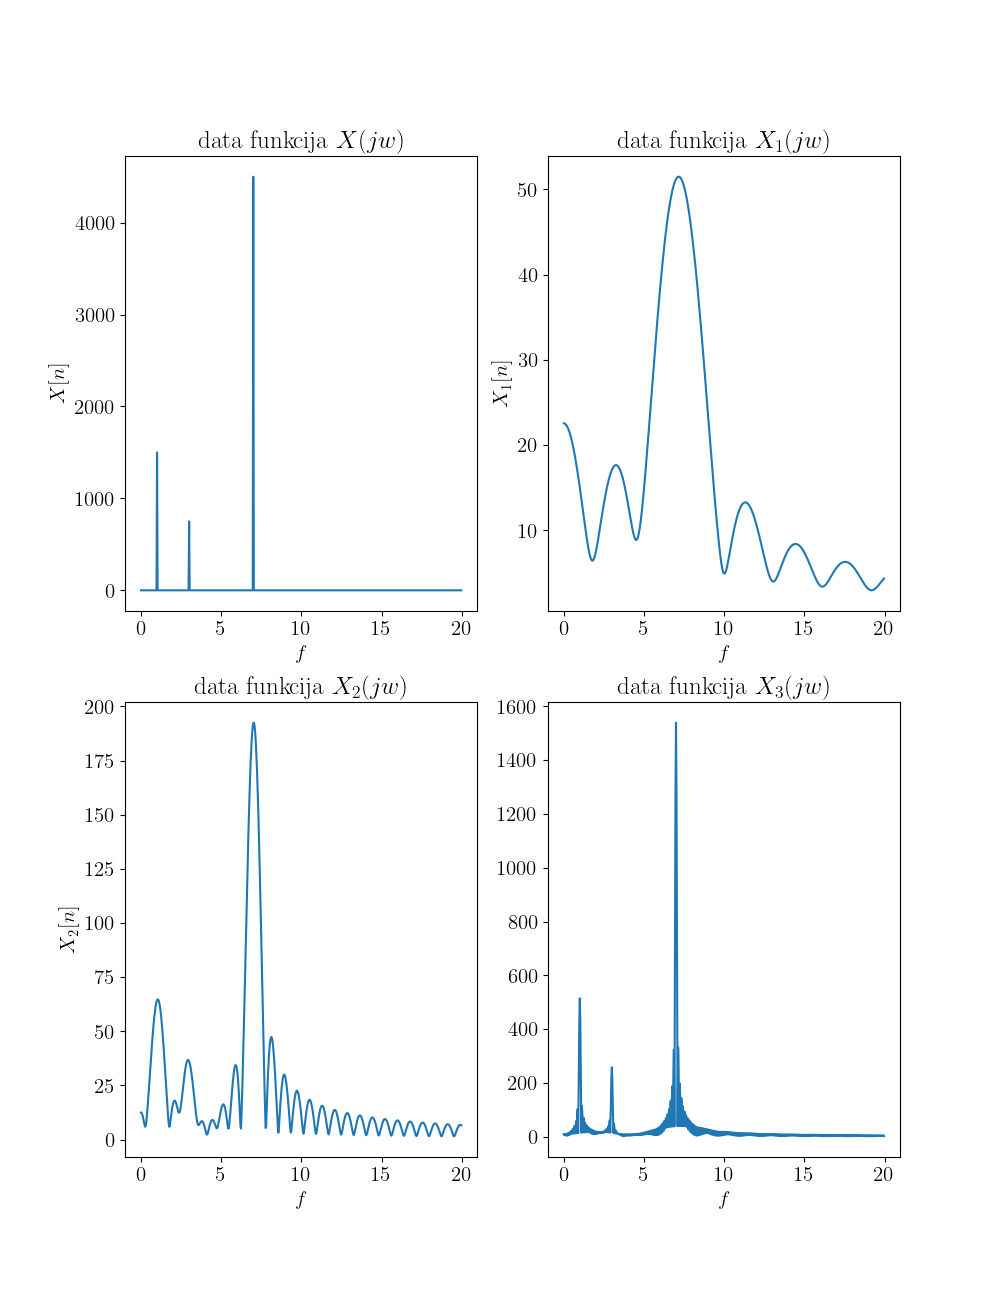

In [6]:
#prva tacka


def fourierTransform(x, N):
    # Ova funkcija izračunava Furijeovu transformaciju u N ekvidistantnih tačaka
    if len(x) < N:
        x = np.append(x, np.zeros(N - len(x)))

    X = np.zeros(N, dtype = 'complex')
    n = np.arange(N)
    for k in range(N):
        Omega_k = 2*np.pi/N*k
        X[k] = np.sum(x*np.exp(-1j*Omega_k*n))
    
    return X


fs = 100.0
duration = 10
N = 3000
N1 = 32
N2 = 128
N3 = 1024

t = np.arange(0, N, 1)

t1 = (t * fs) / N       #pretvaramo vreme u herce


f1 = 1.0
f2 = 3.0
f3 = 7.0
F1 = f1/fs
F2 = f2/fs
F3 = f3/fs

x = np.cos(2*np.pi*F1*t) + 0.5*np.cos(2*np.pi*F2*t) + 3*np.cos(2*np.pi*F3*t) 


x1 = x[0:N1]
x2 = x[0:N2]
x3 = x[0:N3]    
    

X = fourierTransform(x, N)
X1 = fourierTransform(x1, N)
X2 = fourierTransform(x2, N)
X3 = fourierTransform(x3, N)

k = int(N/5)

fx = t1[0:k]
Xk = X[0:k]
X1k = X1[0:k]
X2k = X2[0:k]
X3k = X3[0:k]

fig, ax = plt.subplots(2, 2, figsize = [10, 13])

ax[0][0].plot(fx, abs(Xk))
ax[0][0].set_title('data funkcija $X(jw)$')
ax[0][0].set_xlabel('$f$')
ax[0][0].set_ylabel('$X[n]$')
#plt.ylim(0, 400) 
#ax.set_xlim([0, N/5])
#ax.set_ylim(0, (abs(X)/N));

ax[0][1].plot(fx, abs(X1k))
ax[0][1].set_title('data funkcija $X_1(jw)$')
ax[0][1].set_xlabel('$f$')
ax[0][1].set_ylabel('$X_1[n]$')
#plt.ylim(0,200) 

ax[1][0].plot(fx, abs(X2k))
ax[1][0].set_title('data funkcija $X_2(jw)$')
ax[1][0].set_xlabel('$f$')
ax[1][0].set_ylabel('$X_2[n]$')
 
    

ax[1][1].plot(fx, abs(X3k))
ax[1][1].set_title('data funkcija $X_3(jw)$')
ax[1][1].set_xlabel('$f$')
#plt.ylim(0, 400) 
#ax.set_ylim(0, int(abs(X)/N));


Prvu tačku prvog dela zadatka smo rešili tako što smo definisali funkciju koja izračunava Furijeovu transformaciju datog signala u dovoljnom broju tačaka (u ovom slučaju broj tačaka je $N = 3000$), zatim smo tražene signale $x_1$, $x_2$ i $x_3$ odabirali u $N_1$, $N_2$ i $N_3$ tačaka i plotovali njihove amplitudske karakteristike, kao i amplitudsku karakteristiku datog signala $x(t)$ koju smo koristili da uporedimo dobijene rezultate.

In [7]:


#tacka dva

#N = 3000
#k = int(N/5)

#fx = t1[0:k]
#Xk = X[0:k]
#X1k = X1[0:k]
#X2k = X2[0:k]
#X3k = X3[0:k]


#fig, ax = plt.subplots(figsize = [10, 6])
#plt.stem(abs(X1k))
#plt.xlabel(r'$k$');
#plt.ylabel(r'$X_1[k]$');
# svi lokalni maksimumi
peaksPos1 = signal.argrelextrema(abs(X1k), np.greater) 
peaksPos1 = peaksPos1[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos1 = np.argsort(-abs(X1k[peaksPos1])) 
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeakIndex1 = peaksPos1[maxPeaksPos1]
print(maxPeakIndex1[:3])


#fig, ax = plt.subplots(figsize = [10, 6])
#plt.stem(abs(X2k))
#plt.xlabel(r'$k$');
#plt.ylabel(r'$X2[k]$');
# svi lokalni maksimumi
peaksPos2 = signal.argrelextrema(abs(X2k), np.greater) 
peaksPos2 = peaksPos2[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos2 = np.argsort(-abs(X2k[peaksPos2])) 
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeakIndex2 = peaksPos2[maxPeaksPos2]
print(maxPeakIndex2[:3])


#fig, ax = plt.subplots(figsize = [10, 6])
#plt.stem(abs(X3k))
#plt.xlabel(r'$k$');
#plt.ylabel(r'$X3[k]$');
# svi lokalni maksimumi
peaksPos3 = signal.argrelextrema(abs(X3k), np.greater) 
peaksPos3 = peaksPos3[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos3 = np.argsort(-(X3k[peaksPos3]))
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeakIndex3 = peaksPos3[maxPeaksPos3]
print(maxPeakIndex3[:3])

[215  98 340]
[211  31 244]
[210  30  90]


In [8]:
# Za N1 = 32 imamo da su tri najvece frekvencijske komponente za k = {215, 98, 340} pa su tada ucestanosti 
#f za ove tacke sledece:

k1 = 215 
k2 = 98
k3 = 340


f_1 = maxPeakIndex1[1] * fs/N
f_2 = maxPeakIndex1[2] * fs/N
f_3 = maxPeakIndex1[0] * fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)

#racunanje greske

#f_1_gr = (abs(f_1 - f1)/f1)
#print("%.2f" %f_1_gr)
#f_2_gr = (abs(f_2 - f2)/f2) 
#print("%.2f" %f_2_gr)



# Za N2 = 128 imamo da su tri najvece frekvencijske komponente za k = {211, 31, 244} 
#pa su tada ucestanosti f za ove tacke sledece:

k1 = 211
k2 = 31
k3 = 244

f_1 = maxPeakIndex2[1] * fs/N
f_2 = maxPeakIndex2[2] * fs/N
f_3 = maxPeakIndex2[0]* fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)

# Za N3 = 1024 imamo da su tri najvece frekvencijske komponente za k = {210, 30, 90} 
#pa su tada ucestanosti f za ove tacke sledece:

k1 = 210
k2 = 30
k3 = 90

f_1 = maxPeakIndex3[1] * fs/N
f_2 = maxPeakIndex3[2] * fs/N
f_3 = maxPeakIndex3[0]* fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)

3.27 11.33 7.17
1.03 8.13 7.03
1.00 3.00 7.00


U ovoj tački smo korišćenjem funkcije za izračunavanje indeksa maksimalnih vrednosti frekvencijskih učestanosti u originalnom nizu odredili u kojim tačkama se nalaze tri najveća maksimuma, na osnovu kojih procenjujemo učestanosti $f_1$, $f_2$ i $f_3$.
U segmentu ispod, na osnovu dobijenih rezultata, možemo izvući sledeće zaključke.

U prvom slučaju kada je $N_1 = 32$, dobijamo da su nam maksimalne učestanosti 3.27, 11.33 i 7.17 Hz, odnosno, kada pogledamo dobijeni plot za amplitudsku karakteristiku imamo samo jednu pogrešnu učestanost koja iznosi 3.27 Hz (druge dve su približno na 7 i 11 Hz). Učestanost od 1 Hz se nalazi na početku spektra i ona je zanemarena (odsečena).

Za drugi slučaj kada je $N_2 = 128$ dobijamo takođe jednu pogrešnu učestanost, od 8.13 Hz, dok su druge dve od 1 Hz i 7 Hz dobre.

U poslednjem slučaju, za $N_3 = 1024$ dobijamo sve tačne učestanosti.

Text(0.5, 0, '$f$')

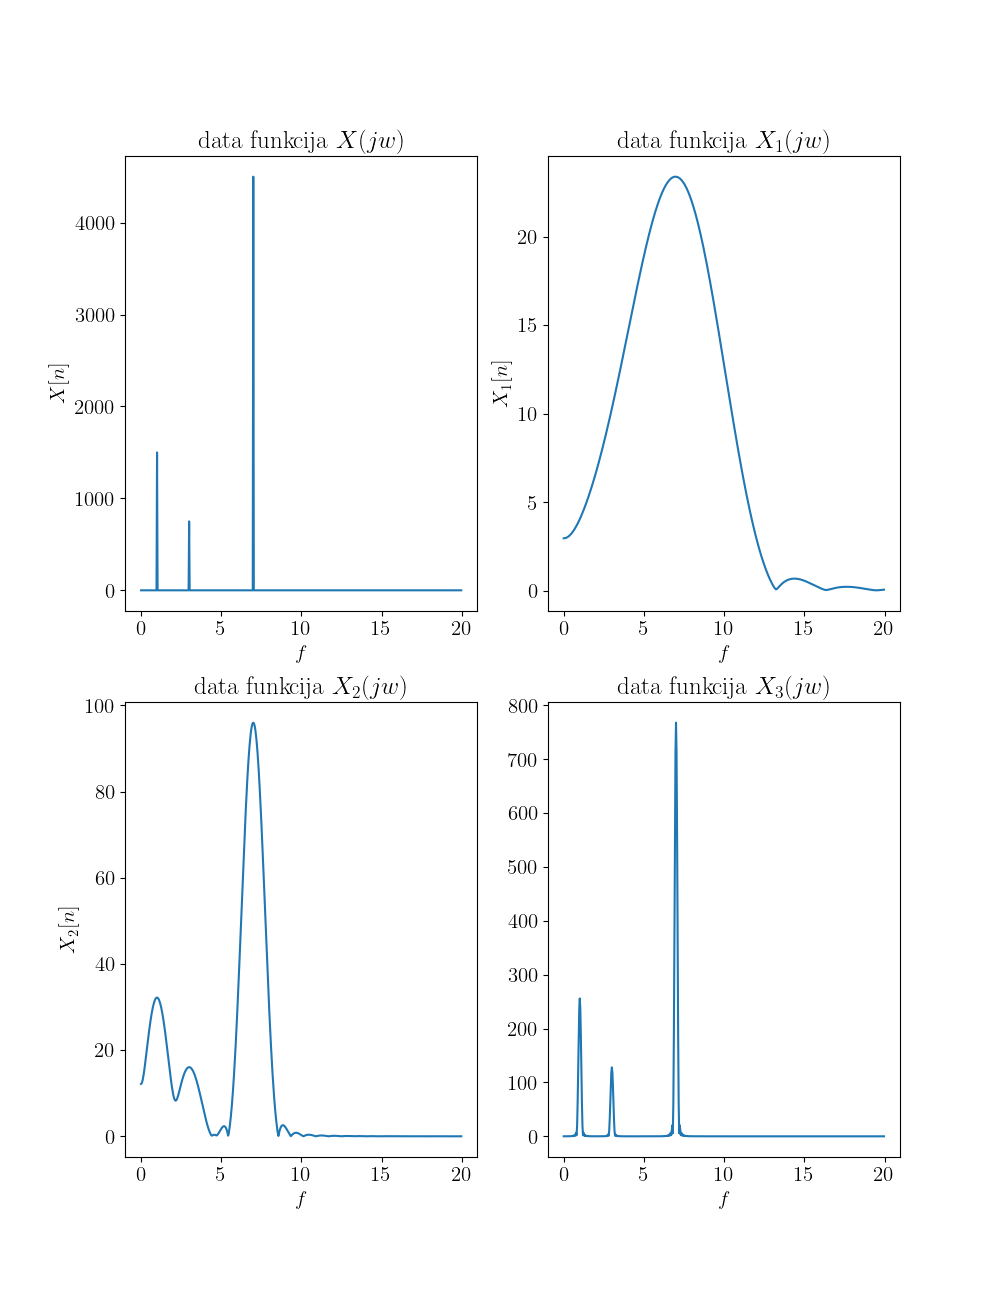

In [9]:
#tacka tri

#U ovoj tacki cemo upotrebiti Hanovu prozorsku funkciju ciji odbirci opadaju od nule ka krajevima.

n1 = np.arange(N1)
n2 = np.arange(N2)
n3 = np.arange(N3)


hann1 = signal.hann(N1, sym = False)
hann2 = signal.hann(N2, sym = False)
hann3 = signal.hann(N3, sym = False)

X1 = fourierTransform(x1 * hann1, N)
X2 = fourierTransform(x2 * hann2, N)
X3 = fourierTransform(x3 * hann3, N)


X1n = X1[0:k]
X2n = X2[0:k]
X3n = X3[0:k]

fig, ax = plt.subplots(2, 2, figsize = [10, 13])

ax[0][0].plot(fx, abs(Xk))
ax[0][0].set_title('data funkcija $X(jw)$')
ax[0][0].set_xlabel('$f$')
ax[0][0].set_ylabel('$X[n]$')


ax[0][1].plot(fx, abs(X1n))
ax[0][1].set_title('data funkcija $X_1(jw)$')
ax[0][1].set_xlabel('$f$')
ax[0][1].set_ylabel('$X_1[n]$')


ax[1][0].plot(fx, abs(X2n))
ax[1][0].set_title('data funkcija $X_2(jw)$')
ax[1][0].set_xlabel('$f$')
ax[1][0].set_ylabel('$X_2[n]$')
 
    

ax[1][1].plot(fx, abs(X3n))
ax[1][1].set_title('data funkcija $X_3(jw)$')
ax[1][1].set_xlabel('$f$')






In [10]:
#tacka cetiri

peaksPos1 = signal.argrelextrema(abs(X1n), np.greater) 
peaksPos1 = peaksPos1[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos1 = np.argsort(-abs(X1n[peaksPos1])) 
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeak1 = peaksPos1[maxPeaksPos1]
print(maxPeak1[:3])


peaksPos2 = signal.argrelextrema(abs(X2n), np.greater) 
peaksPos2 = peaksPos2[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos2 = np.argsort(-abs(X2n[peaksPos2])) 
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeak2 = peaksPos2[maxPeaksPos2]
print(maxPeak2[:3])


peaksPos3 = signal.argrelextrema(abs(X3n), np.greater) 
peaksPos3 = peaksPos3[0]
# indeksi lokalnih maksimuma koji su najveci
# znak "-" stoji da bi se dobili indeksi u opadajucem redosledu - prvi u nizu odgovaraju maksimalnim vrednostima
maxPeaksPos3 = np.argsort(-abs(X3n[peaksPos3]))
# indeksi maksimalnih vrednosti u originalnom nizu u opadajucem redosledu
maxPeak3 = peaksPos3[maxPeaksPos3]
print(maxPeak3[:3])

[209 431 529]
[210  30  90]
[210  30  90]


In [11]:
# Za N1 = 32 imamo da su tri najvece frekvencijske komponente za k = {209, 431, 529} pa su tada ucestanosti 
#f za ove tacke sledece:


f_1 = maxPeak1[1] * fs/N
f_2 = maxPeak1[2] * fs/N
f_3 = maxPeak1[0] * fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)


# Za N2 = 128 imamo da su tri najvece frekvencijske komponente za k = {210, 30, 90} 
#pa su tada ucestanosti f za ove tacke sledece:



f_1 = maxPeak2[1] * fs/N
f_2 = maxPeak2[2] * fs/N
f_3 = maxPeak2[0]* fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)

# Za N3 = 1024 imamo da su tri najvece frekvencijske komponente za k = {210, 30, 90} 
#pa su tada ucestanosti f za ove tacke sledece:


f_1 = maxPeak3[1] * fs/N
f_2 = maxPeak3[2] * fs/N
f_3 = maxPeak3[0]* fs/N

print("%.2f" %f_1, "%.2f" %f_2, "%.2f" %f_3)

14.37 17.63 6.97
1.00 3.00 7.00
1.00 3.00 7.00


Na osnovu dobijenih plotova i vrednosti za maksimalne frekvencije, možemo zaključiti da do greške dolazi samo kod prvog spektra $X_1$, gde su najveće učestanosti odsečene, kod druga dva spektra imamo tačne vrednosti.

U tački pet, proveravanjem ostalih prozorskih funkcija (zamenjujući ih u kod od gore) zaključujemo da su rezultati slični kao za prozorsku funkciju koju smo koristili.

Text(0, 0.5, '$X[k]$')

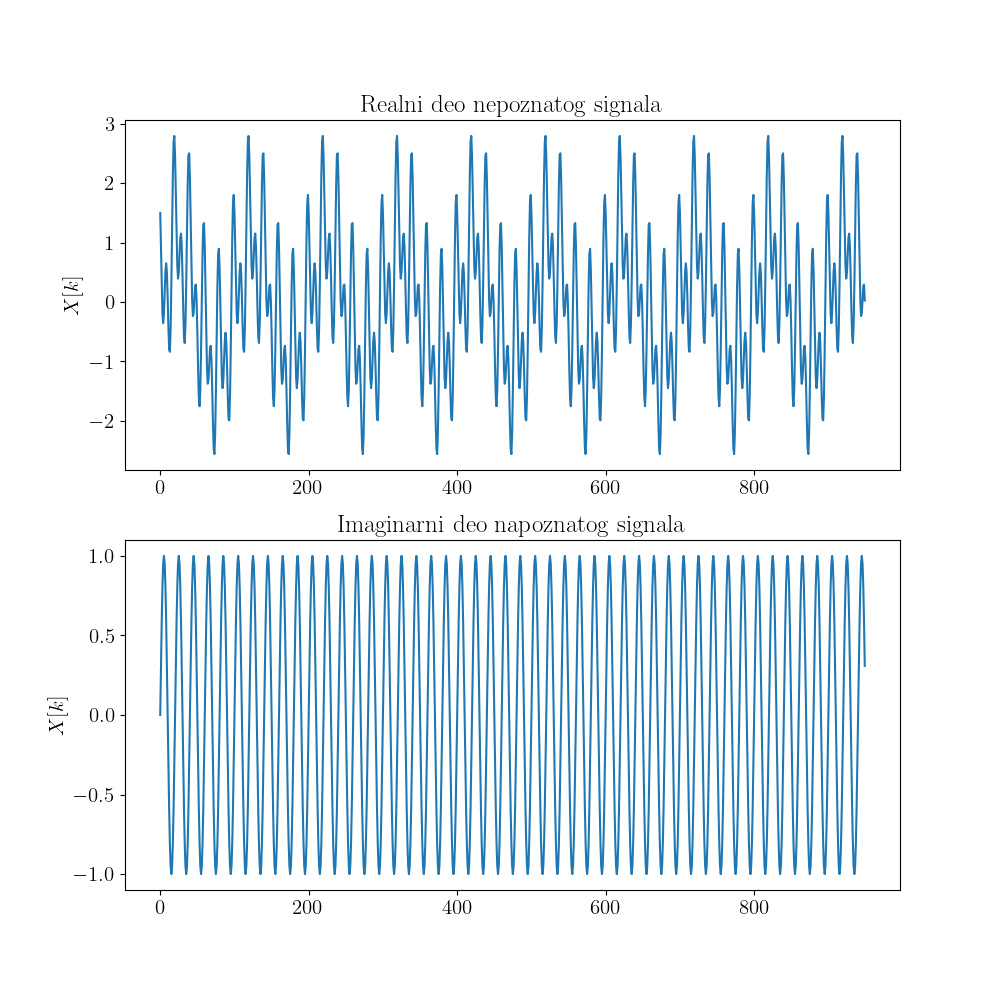

In [12]:
#tacka sest


import pickle


nepoznati_signal = pickle.load(open('nepoznati_signal.pkl','rb'))

    
N_novo = 1000
t = np.arange(N_novo) 


fig, axs = plt.subplots(2, 1, figsize = [10, 10])
axs[0].plot(nepoznati_signal.real)
axs[1].plot(nepoznati_signal.imag)
axs[0].set_title('Realni deo nepoznatog signala')
#axs[0].set_xlabel('$f$')
axs[0].set_ylabel('$X[k]$')

axs[1].set_title('Imaginarni deo napoznatog signala')
axs[1].set_ylabel('$X[k]$')


#fig, ax = plt.subplots()
#NS = fourierTransform(nepoznati_signal, N_novo)
#plt.plot(t, abs(NS))         
#
#axs[1].set_xlabel('$f$')

    

#proba da vidimo koji su maksimumi nepoznatog signala

# svi lokalni maksimumi
#peaksPos = signal.argrelextrema(NS, np.greater) 
#peaksPos = peaksPos[0]
#maxPeaksPos = np.argsort(-NS[peaksPos]) 
#maxPeakIndex = peaksPos[maxPeaksPos]
#print(maxPeakIndex[:5])


interactive(children=(IntSlider(value=475, description='i', max=950, min=5, step=5), Output()), _dom_classes=(…

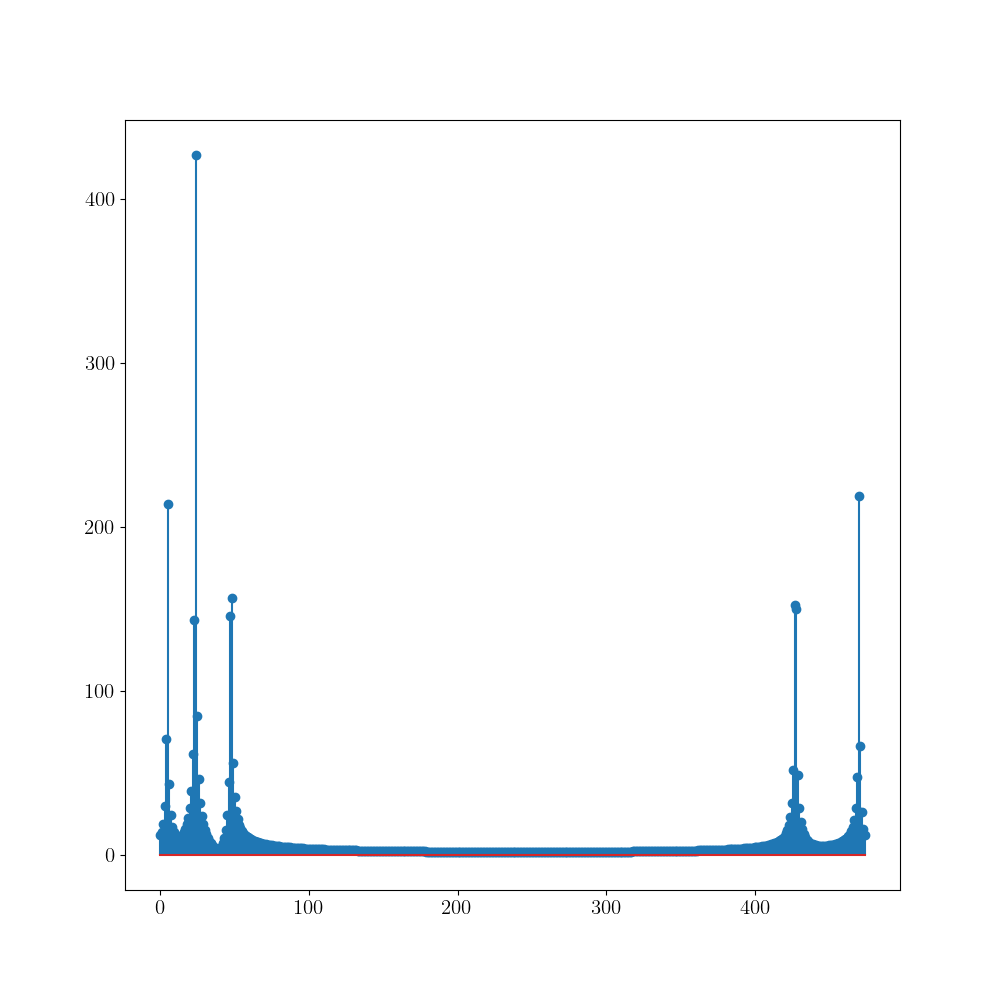

In [13]:
#tacka sedam


#import matplotlib.pyplot as plot
import ipywidgets as widgets

h = pickle.load(open('nepoznati_signal.pkl', 'rb'))
N = len(h)
fig = plt.figure(figsize = [10, 10])
def curenje_spektra(i):
    plt.clf()
    H = fourierTransform(h[:i], i)
    plt.stem(abs(H))

    
widgets.interact(curenje_spektra, i = (5, N, 5));





Na osnovu dobijenog dijagrama vidimo da za N = 5, 100, 200, 300, 400 ..., 800, 900 nema curenja spektra.

Text(0, 0.5, '$arg \\{X[k]\\}$')

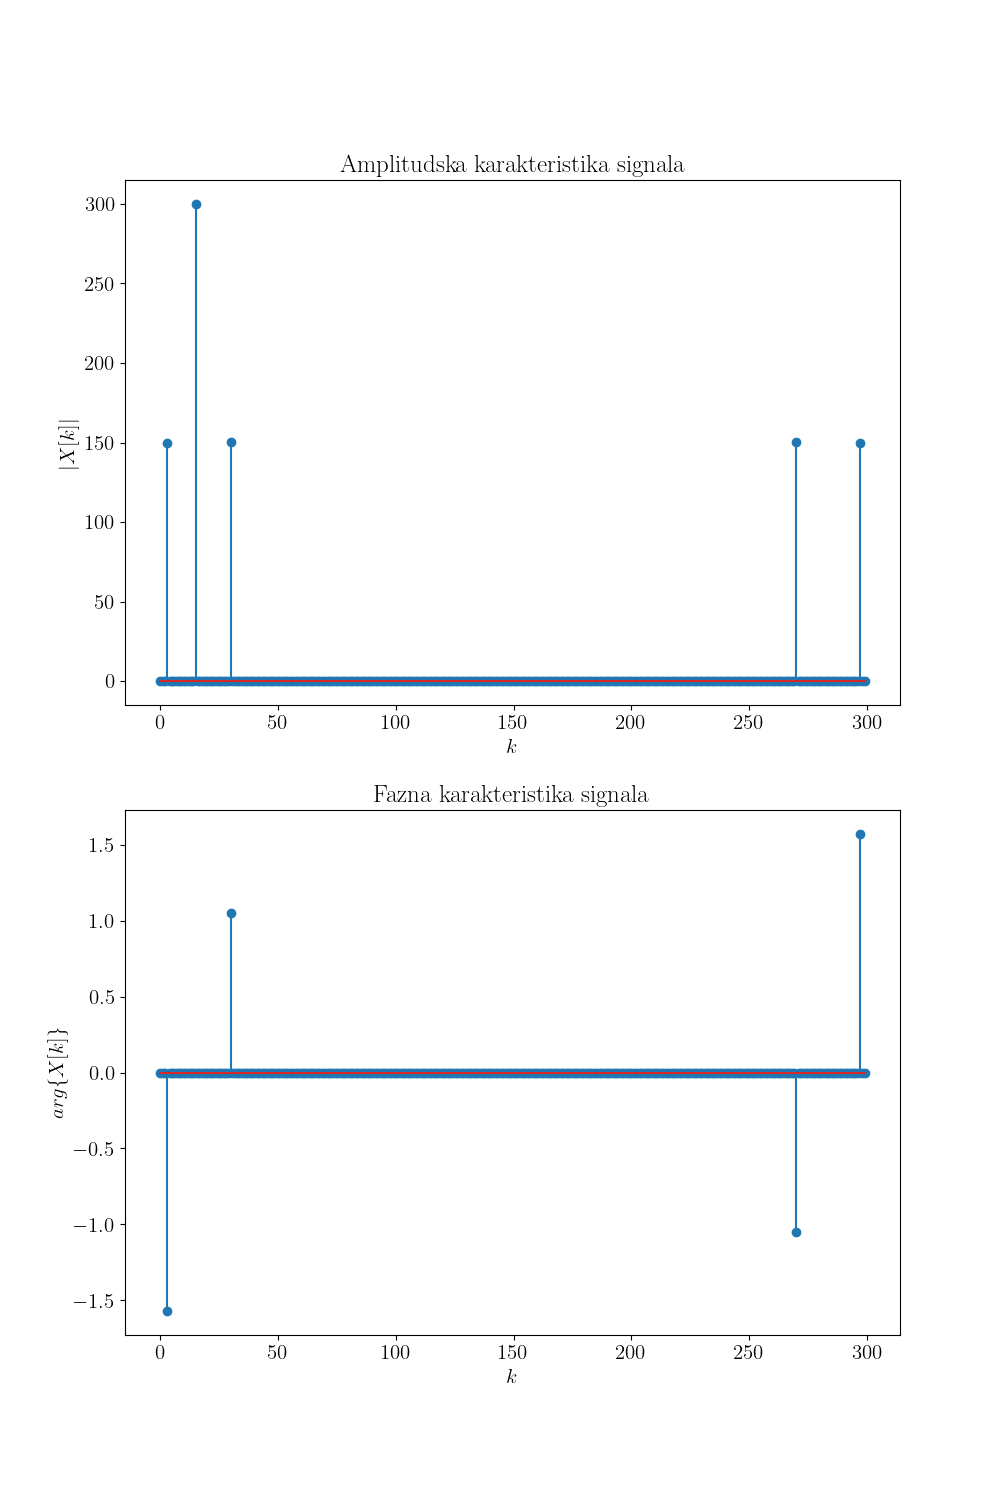

In [14]:
#tacka osam

time = np.arange(0, 300, 1)

h = pickle.load(open('nepoznati_signal.pkl', 'rb'))
N = 300
H = fourierTransform(h[:300], N)



fig, ax = plt.subplots(2, 1, figsize = [10, 15])
ax[0].stem(abs(H))
ax[0].set_title('Amplitudska karakteristika signala')
ax[0].set_xlabel('$k$')
ax[0].set_ylabel('$|X[k]|$')

ax[1].stem(np.angle(H) * (abs(H) > 0.0001)) 
ax[1].set_title('Fazna karakteristika signala')
ax[1].set_xlabel('$k$')
ax[1].set_ylabel('$arg \{X[k]\}$')


#print(H>0)

U ovom delu za N smo uzeli 300 tačaka, tako da ne postoji curenje spektra, i plotovali amplitudsku i faznu karakteristiku.

Na osnovu dobijenih karakteristika određujemo analitički oblik signala.
Sa fazne karakteristike vidimo da za vrednosti od približno 1 i 1.5 radijana, imamo dve faze koje su približno $\frac{\pi}{3}$ i $\frac{\pi}{2}$.

Traženi signal je $\cos(\frac{2\pi}{100} n + \frac{\pi}{2})$ + $\cos(\frac{2\pi}{10} n + \frac{\pi}{3})$ + $e^{\frac{j 2\pi}{20} n}$

In [15]:
#tacke deset i jedanaest
def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

import IPython.display as ipd

fs = 8000 #frekvencija odabiranja
beta = 800


T = 1/fs  
t = np.arange(0, 5 + T, T)
x = np.sin(2*np.pi * beta/2 * t**2)

t1 = np.arange(0, 5 + T/2, T/2)
t2 = np.arange(0, 5 + T/5, T/5)

x_d2 = np.sin(2*np.pi * beta/2 * t1**2)
x_d5 = np.sin(2*np.pi * beta/2 * t2**2)

x_d2 = []
x_d5 = []



for i in range(0, 5*fs):
    if i % 2 == 0:
        x_d2.append(x[i])
    if i % 5 == 0:
        x_d5.append(x[i])  
        
ipd.Audio(x, rate=fs) 

In [16]:
ipd.Audio(x_d2, rate=fs/2) 

In [17]:
ipd.Audio(x_d5, rate=fs/5) 


Text(0, 0.5, '$f$ [Hz]')

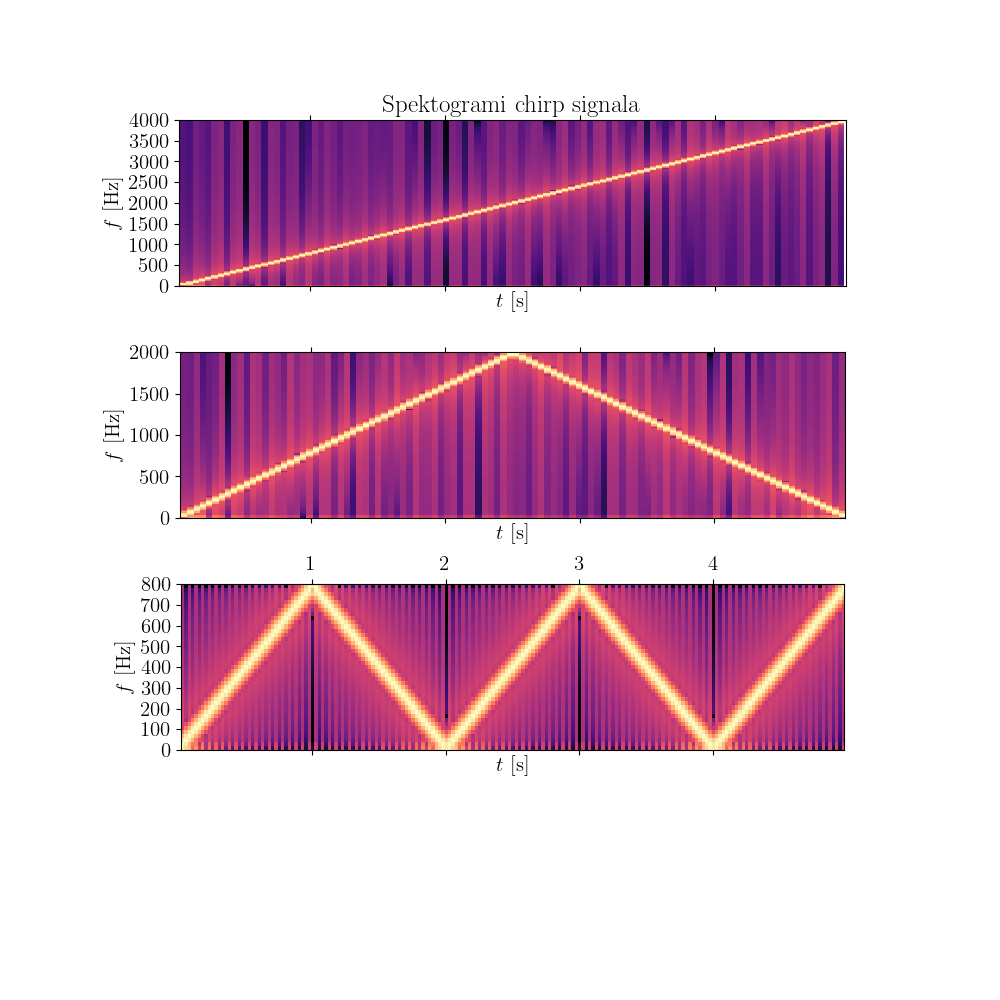

In [18]:
#tacka dvanaest

def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

import IPython.display as ipd



fMaxShow1 = 4000
fMaxShow2 = 2000
fMaxShow3 = 800


Nwin = int(len(x)/80)
Nwin1 = int(len(x_d2)/80)
Nwin2 = int(len(x_d5)/100)
window = signal.hamming(Nwin, sym=False)
window1 = signal.hamming(Nwin1, sym=False)
window2 = signal.hamming(Nwin2, sym=False)





fig, axs = plt.subplots(3, 1, figsize = [10,10], sharex=True)
plt.subplots_adjust(bottom=0.25, hspace = 0.4)


f, t, Sxx = signal.spectrogram(np.array(x), fs = fs, window=window, noverlap=Nwin/4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')

axs[0].matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(f), fMaxShow1], origin='lower', cmap='magma')
forceAspect(axs[0], 4)


# Obeležavanje osa
axs[0].set_title('Spektogrami chirp signala')
axs[0].set_xlabel('$t$ [s]')
axs[0].set_ylabel('$f$ [Hz]')

f, t, Sxx = signal.spectrogram(np.array(x_d2), fs = fs/2, window=window1, noverlap=Nwin1/4, nfft=Nwin1, return_onesided=True, 
                               scaling='spectrum', mode='complex')


axs[1].matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(f), fMaxShow2], origin='lower', cmap='magma')
forceAspect(axs[1], 4)


# Obeležavanje osa
axs[1].set_xlabel('$t$ [s]')
axs[1].set_ylabel('$f$ [Hz]')



f, t, Sxx = signal.spectrogram(np.array(x_d5), fs = fs/5, window=window2, noverlap=Nwin2/2, nfft=Nwin2, return_onesided=True, 
                               scaling='spectrum', mode='complex')
axs[2].matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(f), fMaxShow3], origin='lower', cmap = 'magma')
forceAspect(axs[2], 4)


# Obeležavanje osa
axs[2].set_xlabel('$t$ [s]')
axs[2].set_ylabel('$f$ [Hz]')



Kao što možemo da primetimo, u prvom slučaju, kod originalnog chirp signala, zvučni signal ide visoko.
Kod decimiranih verzija chirp signala možemo primetiti promenu u zvuku, izraženije su promene visokih i niskih tonova, koje se najbolje primećuju kod $x_{chirp,d5}$ gde se za učestanost odabiranja uzima pet puta manja učestanost od originalne. Ovde signal zvuči kao da je "iseckan", odnosno ima više prelaza sa visokih na niske tonove i obrnuto. 

Sa spektograma vidimo da zbog Nikvistovovog područja, prvi spektogram ide do maksimalne učestanosti $f_s = 4000Hz$, drugi do $f_s/2 = 2000Hz$ i treći do $f_s/5 = 800Hz$.

### Drugi deo zadatka

U drugom delu zadatka treba da napišemo funkciju za konvoluciju pomoću koje treba da odvojimo snimljen zvuk ptica od šuma (zvuk aviona sa aerodromske piste koja se nalazi pored).

<StemContainer object of 3 artists>

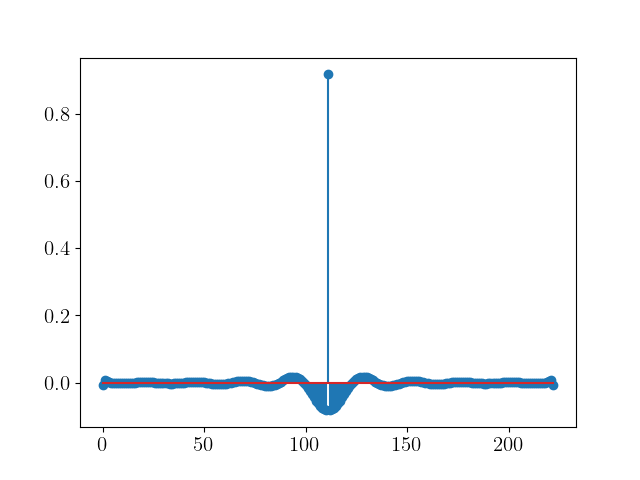

In [19]:
import pickle    
hBirds = pickle.load(open('impulse_response_birds.pkl', 'rb'))
fig = plt.figure()
plt.stem(hBirds)

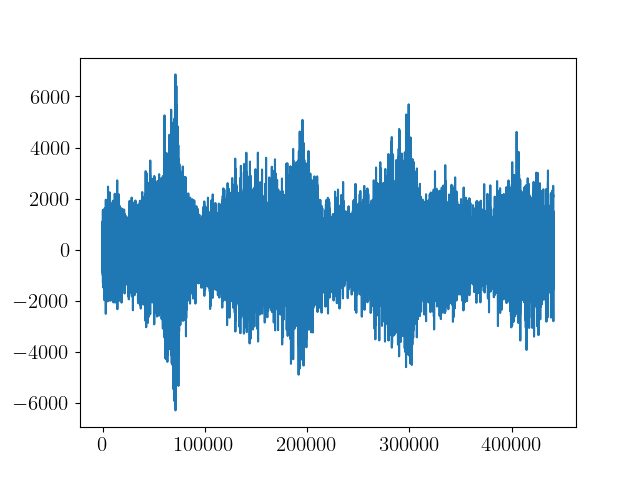

In [20]:
from scipy.io.wavfile import read as wavread
import IPython.display as ipd


fs, birds_airplane = wavread('birds_airplane.wav')
#Audio(data = birds_airplane, rate=fs)


fig = plt.figure()
plt.plot(birds_airplane)
plt.show()


ipd.Audio(birds_airplane, rate = fs)

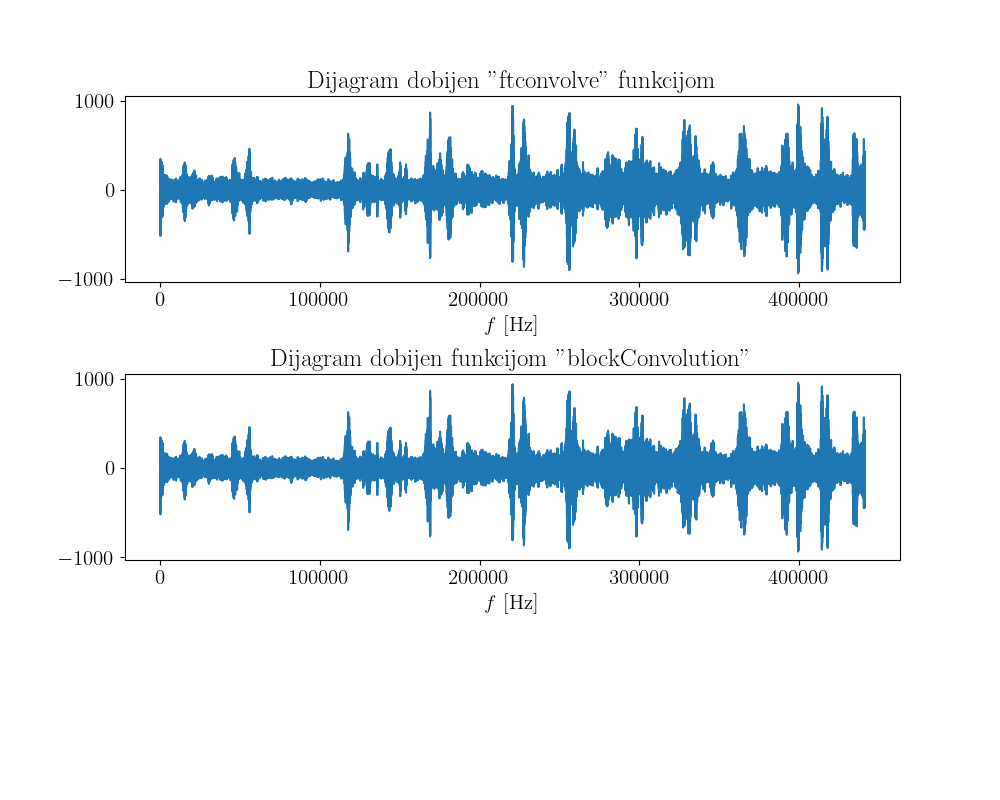

In [21]:
import IPython.display as ipd



def blockConvolution(x, h, blockLength):
    Nx = len(x)
    Nh = len(h)
    Ny = Nx + Nh - 1
    y = np.zeros(Ny)
    for i in range(1, Nx//blockLength + 1):
        xi = np.zeros(Nx + Nh - 1)
        xi[(i - 1)*blockLength : (i*blockLength + Nh - 1)] = fft.ifft(fft.fft(x[(i - 1)*blockLength : i*blockLength], (blockLength + Nh - 1)) * fft.fft(h, (blockLength + Nh - 1))).real
        y = y + xi
    
    ostatak = Nx % blockLength 
    
    if ostatak!= 0:
        xi = np.zeros(Nx + Nh - 1)
        xi[ Ny - (ostatak + Nh - 1)::] = fft.ifft(fft.fft(x[(Nx - ostatak)::], (ostatak + Nh - 1)) * fft.fft(h, (ostatak + Nh - 1))).real
        y = y + xi
    
    return y

#x = [1, 2, 3, 4, 5, 2, 4, 0, 1, 3, 4]
x = birds_airplane
h = hBirds
#h = [1, 1, 1]

y1 = blockConvolution(x, h, 1500)
y = signal.fftconvolve(x, h)



fig, ax = plt.subplots(2, 1, figsize=[10, 8])
plt.subplots_adjust(bottom=0.3, hspace = 0.5)

ax[0].plot(y)
ax[1].plot(y1)


ax[0].set_title('Dijagram dobijen "ftconvolve" funkcijom')
ax[0].set_xlabel('$f$ [Hz]')

ax[1].set_title('Dijagram dobijen funkcijom "blockConvolution" ')
ax[1].set_xlabel('$f$ [Hz]')

ipd.Audio(y, rate=fs) 

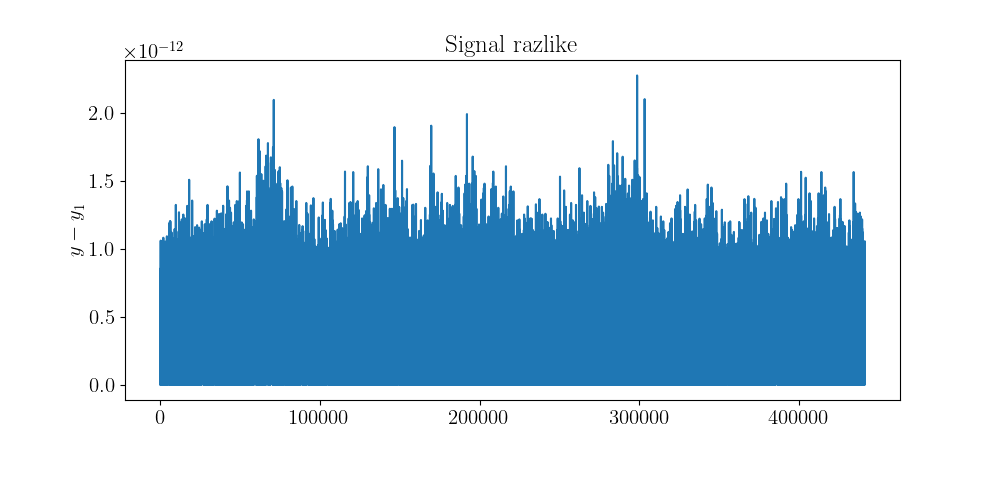

In [22]:
fig, ax = plt.subplots(figsize = [10, 5])
plt.subplots_adjust(bottom=0.2, wspace = 0.25, hspace = 0.3)


ax.plot(abs(y - y1))
ax.set_ylabel('$y - y_1$')
ax.set_title('Signal razlike');
#ax.set_xlabel('$f[Hz]$')


Text(0, 0.5, '$f [Hz]$')

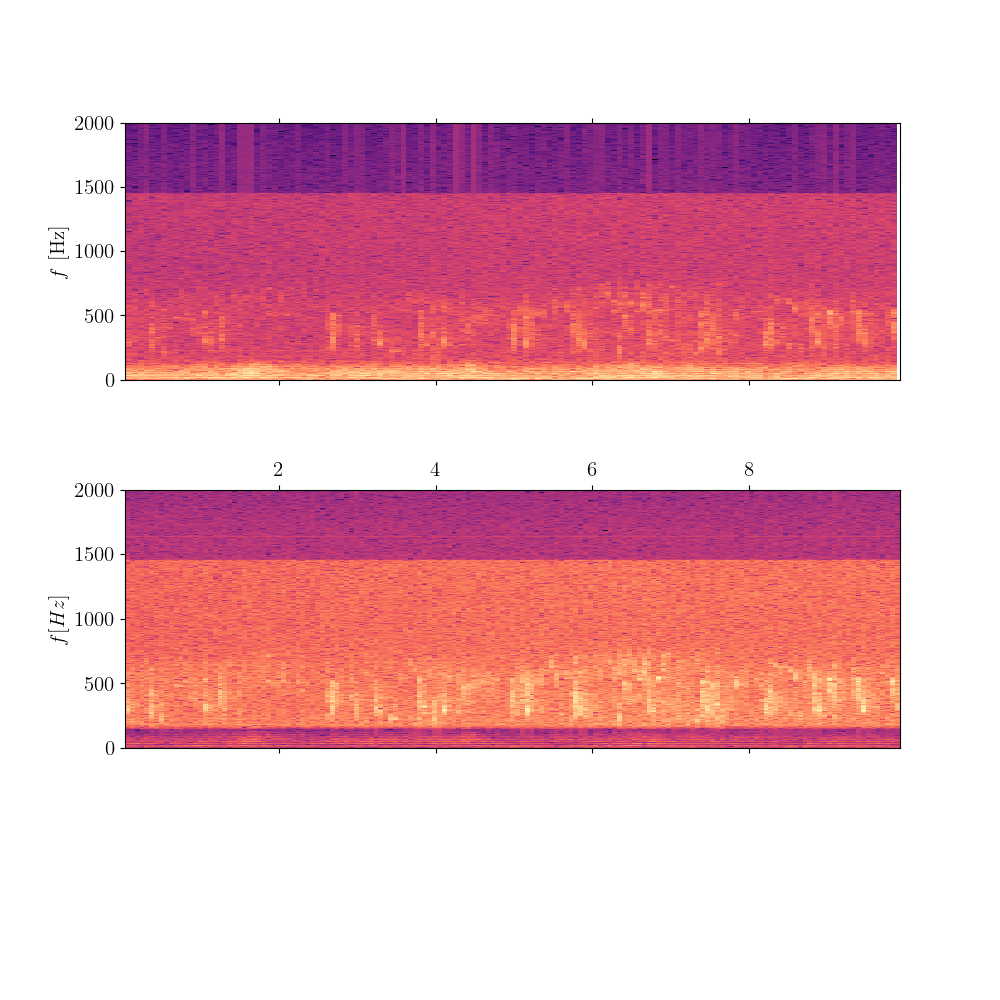

In [28]:
def forceAspect(ax, aspect=1):
    im = ax.get_images()
    extent =  im[0].get_extent()
    ax.set_aspect(abs((extent[1]-extent[0])/(extent[3]-extent[2]))/aspect)

import IPython.display as ipd



fMaxShow = 2000
Nwin = int(len(x)/100)
Nwin1 = int(len(y)/120)
window = signal.hamming(Nwin, sym=False)
window1 = signal.hamming(Nwin1, sym=False)

#print(len(x))
#print(len(y))

fig, axs = plt.subplots(2, 1, figsize = [10,10], sharex=True)
plt.subplots_adjust(bottom=0.25, hspace = 0.4)


f, t, Sxx = signal.spectrogram(np.array(x), fs = fs, window=window, noverlap=Nwin/4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')

axs[0].matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower', cmap='magma')
forceAspect(axs[0], 3)


# Obeležavanje osa
#axs[0].set_title('$Ulazni signal birds_airplane$')
axs[0].set_ylabel('$f$ [Hz]')

f, t, Sxx = signal.spectrogram(np.array(y), fs = fs, window=window1, noverlap=Nwin1/4, nfft=Nwin1, return_onesided=True, 
                               scaling='spectrum', mode='complex')


axs[1].matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(f), fMaxShow], origin='lower', cmap='magma')
forceAspect(axs[1], 3)


# Obeležavanje osa
#axs[1].set_title('$Očišćeni signal$')
axs[1].set_ylabel('$f [Hz]$')

Žuti deo koji možemo da vidimo na spektogramu predstavlja amplitudu signala. Na prvom spektogramu vidimo da imamo amplitude za male frekvencije, što se ne vidi na drugom spektogramu. Odatle zaključujemo da je filtar učitan iz fajla $\textit{impulse_response_birds.pkl}$ high pass filtar, tj. propusnik visokih učestanosti.




### Treći deo zadatka

In [24]:
#Ucitavanje odbiraka impulsnog odziva filtra
matContents = sio.loadmat('dz1_signali/lp_filter.mat')
hSonar = matContents['lp_filter'].squeeze()

#Ucitavanje signala sa sonara
matContents = sio.loadmat('dz1_signali/sonar_signals.mat')
txSignal = matContents['txSignal'].squeeze()
rxSignal = matContents['rxSignal'].squeeze()

y = blockConvolution(txSignal*rxSignal, hSonar, 100000)


Nwin = int(len(y)/1000)

window = signal.hamming(Nwin, sym=False)

fig, ax = plt.subplots(figsize = [10,10])
plt.subplots_adjust(hspace = 0.8, wspace=0.4)

c = 1500
T_chirp = 0.1+0.01
f_1 = 20*10**3
f_2 = 60*10**3
r = (f_2-f_1)/T_chirp
k = c/(2*r)


f, t, Sxx = signal.spectrogram(np.array(y), fs = 200000 ,window=window, noverlap=Nwin/4, nfft=Nwin, return_onesided=True, 
                               scaling='spectrum', mode='complex')
ax.matshow(20*np.log10(abs(Sxx[:][:])), extent=[min(t), max(t), min(k*f), max(k*f)], origin='lower', cmap='magma')
forceAspect(ax, 0.75)
ax.set_title('Spektogram isfiltriranog signala')
ax.set_xlabel('$t$ [s]')
ax.set_ylabel('$dubina$ [m]')
ax.set_ylim([70, 0])
ax.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)

FileNotFoundError: [Errno 2] No such file or directory: 'dz1_signali/lp_filter.mat'

Na osnovu dobijenog spektograma možemo da vidimo da je jezero najdublje na dubini od 66 metara, ova dubina se može uočiti posle skoro 47 sekundi od kada je ribar seo u čamac. 

Postoje dva jata riba koje detektujemo posle 27 i 56 sekundi. Prvo jato se nalazi na dubini od oko 28 $m$, a drugo jato se nalazi na dubini od približno 42 $m$. 

Broj riba u prvom jatu je 29, a u drugom 30.